## **Case Study on Measures of Central Tendency and Dispersion**




The Data set 'StudentsPerformance.csv' provides information about 1000 student's academic details including their gender, ethnicity, parent's education level ,details about whether they took test prepration course or not and also their scores in math,reading and writing tests.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:
##Importing data set
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# 1. Find out how many males and females participated in the test.

In [4]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

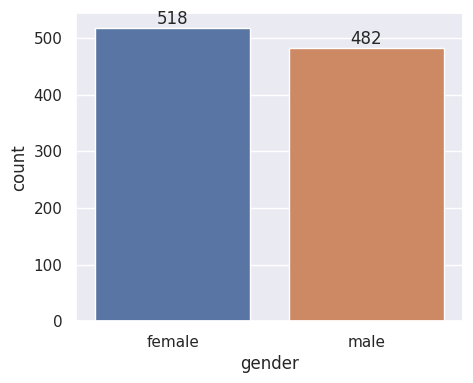

In [40]:
ax = sns.countplot(x= 'gender',data = df)
sns.set(rc={"figure.figsize":(6,5)})
for label in ax.containers:
  ax.bar_label(label)

***In the given data 518 out of 1000 students are girls and 482 are boys.***

# 2. What do you think about the students' parental level of education


In [11]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0.5, 0, 'Total number of parents')

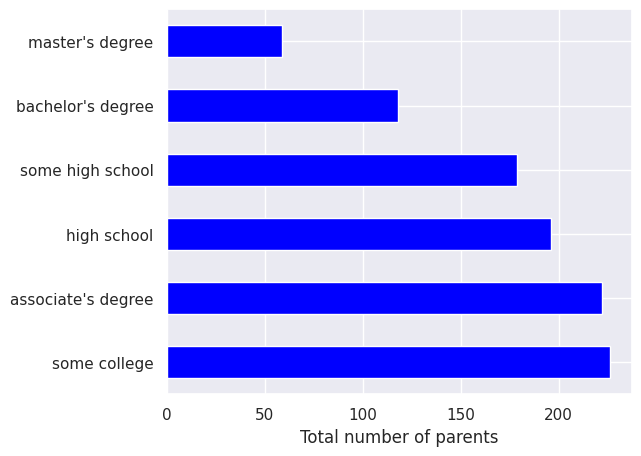

In [41]:
df['parental level of education'].value_counts().plot.barh(color='blue')
plt.xlabel('Total number of parents')

***Out of 1000 parents, 375 parents have only high school level education, 177 have proper college education, i.e., either bachelor's degree or master's degree, 226 have some college education and 222 have an associate's degree.***

In [24]:
df['avg score'] = (df['math score'] + df['reading score'] + df['writing score'] )/ 3

In [25]:
data1=df.groupby(['parental level of education'])[['math score','reading score','writing score','avg score']].mean()
data1

,math score,reading score,writing score,avg score
parental level of education,,,,
associate's degree,67.977477,71.018018,70.031532,69.675676
bachelor's degree,69.288136,73.000000,73.381356,71.889831
high school,61.821429,64.602041,62.403061,62.942177
master's degree,70.254237,75.949153,75.677966,73.960452
some college,67.128319,69.566372,69.035398,68.576696
some high school,63.134078,66.759777,64.888268,64.927374


***Students whose parents have master's degree have higher average marks than those students whose parents have high school qualification***

## 3. Who scores the most on average for math, reading and writing based on
### ● Genderold
### ● Test preparation course 

**Based on Gender**

In [28]:
data=df.groupby(['gender'])[['math score','reading score','writing score']].mean()
data

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


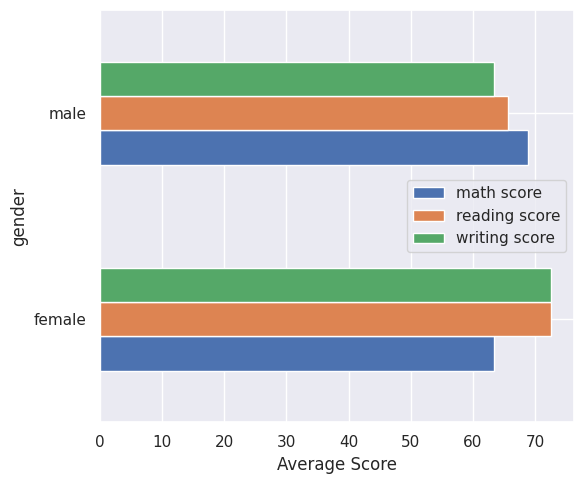

In [42]:
data.plot.barh()
plt.xlabel('Average Score')
plt.tight_layout()

***It can be seen that the female students scores the most on average for reading and writing; meanwhile, the male students scores the most on average for maths.***

### **Based on Test preparation course**

In [31]:
data1=df.groupby(['test preparation course'])[['math score','reading score','writing score']].mean()
data1

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


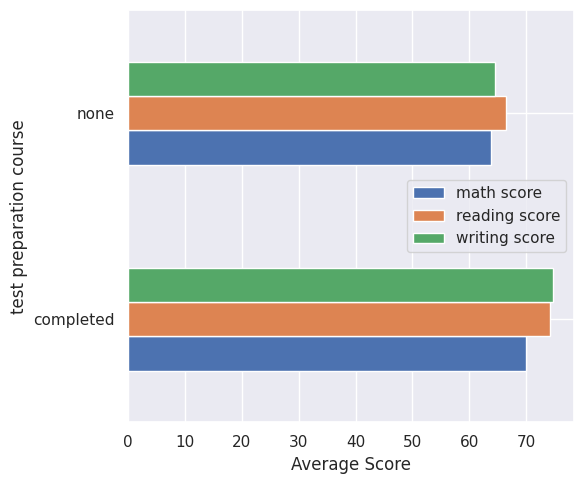

In [43]:
data1.plot.barh()
plt.xlabel('Average Score')
plt.tight_layout()

***The students who had completed the course, have scored better in all the three skills than those who hadnt completed the course***


## 4. What do you think about the scoring variation for math, reading and writing based on
## ● Gender
## ● Test preparation course  

In [33]:
# Based on Gender
df[['gender','math score','reading score','writing score']].groupby('gender').var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


***It can been seen that the scores of female students varied more from the mean than the scores of the male students.***

In [34]:
# Based of Test Preparation Course
df[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


***Here, the scores of the students who had taken the test preparation course varied less from the mean than the scores of the students who hadnt taken the course.***

## 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [35]:
#seperating the math score from the whole data
math_score = df['math score']

#find 75 percentile using percentile function
print(np.percentile(math_score, 75))


77.0


In [38]:
#Seperating total number of students who scored more than 25 percentile.
Total_number = math_score[math_score>77]

Total_number.count()


231

In [39]:
df.nlargest(231, ['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
515,female,group E,some college,standard,none,100,92,97,96.333333
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
...,...,...,...,...,...,...,...,...,...
861,male,group C,some high school,standard,completed,78,72,69,73.000000
862,male,group D,high school,free/reduced,completed,78,77,80,78.333333
863,male,group D,some high school,standard,completed,78,81,86,81.666667
864,male,group E,some high school,free/reduced,completed,78,83,80,80.333333


### ***Total 231 students are eligible for bonus***